<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module2_Lab1_AIML_-/blob/main/MODULE2_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 2: Appreciating,Interpreting and Visulizing Data**

Lab1:Basic Plots

In [34]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [36]:
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [37]:
data.replace(164, np.nan, inplace = True)
data = data.dropna()
print(len(data))

202


In [38]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')

data = data.dropna(subset=['price'])

X = data.drop("price", axis=1)
y = data["price"]

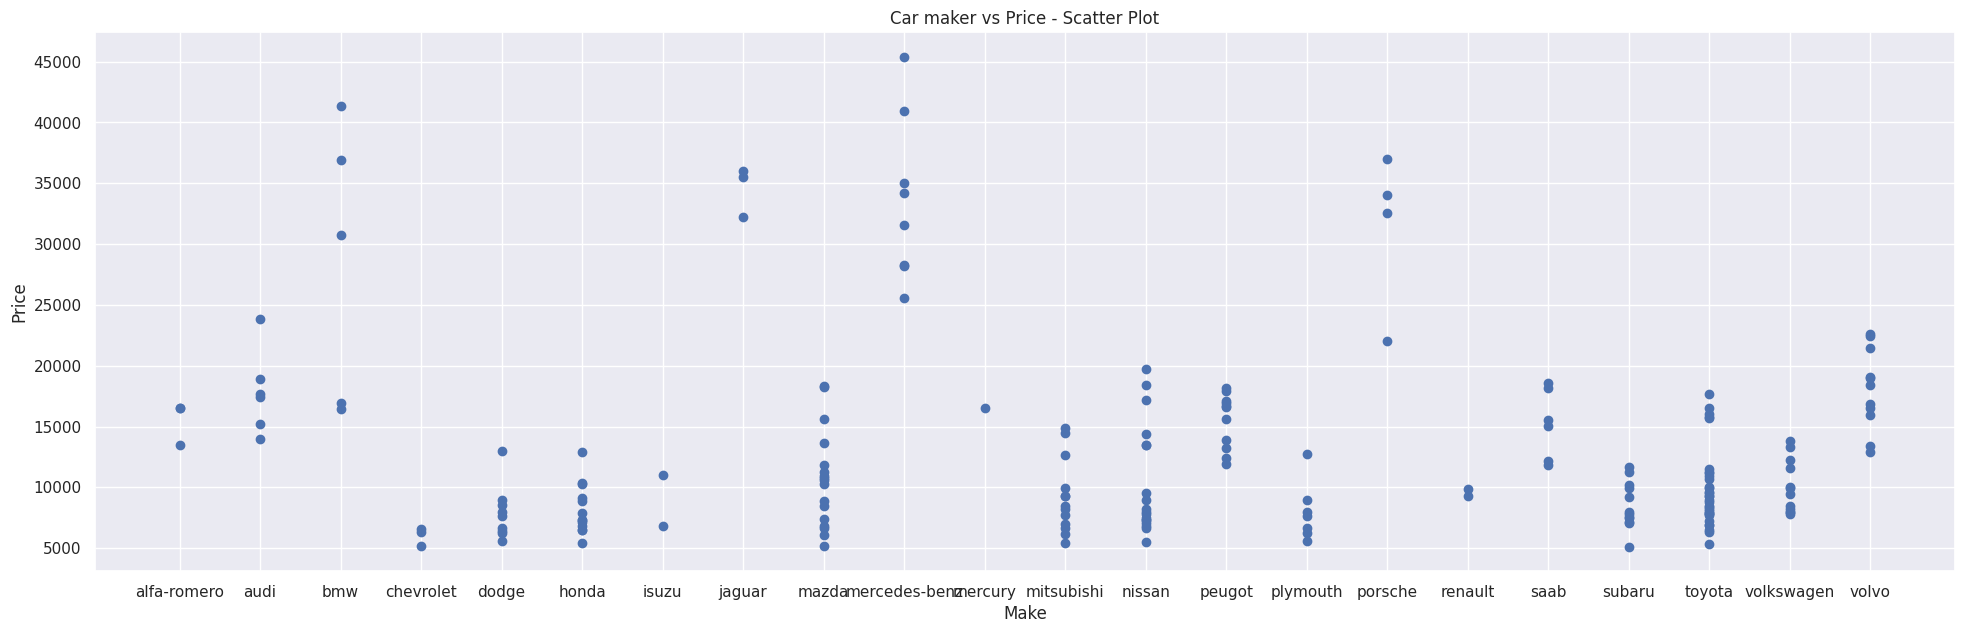

In [39]:
plt.figure(figsize = (24, 7))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

<ipython-input-40-0447ba8df549>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')


Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

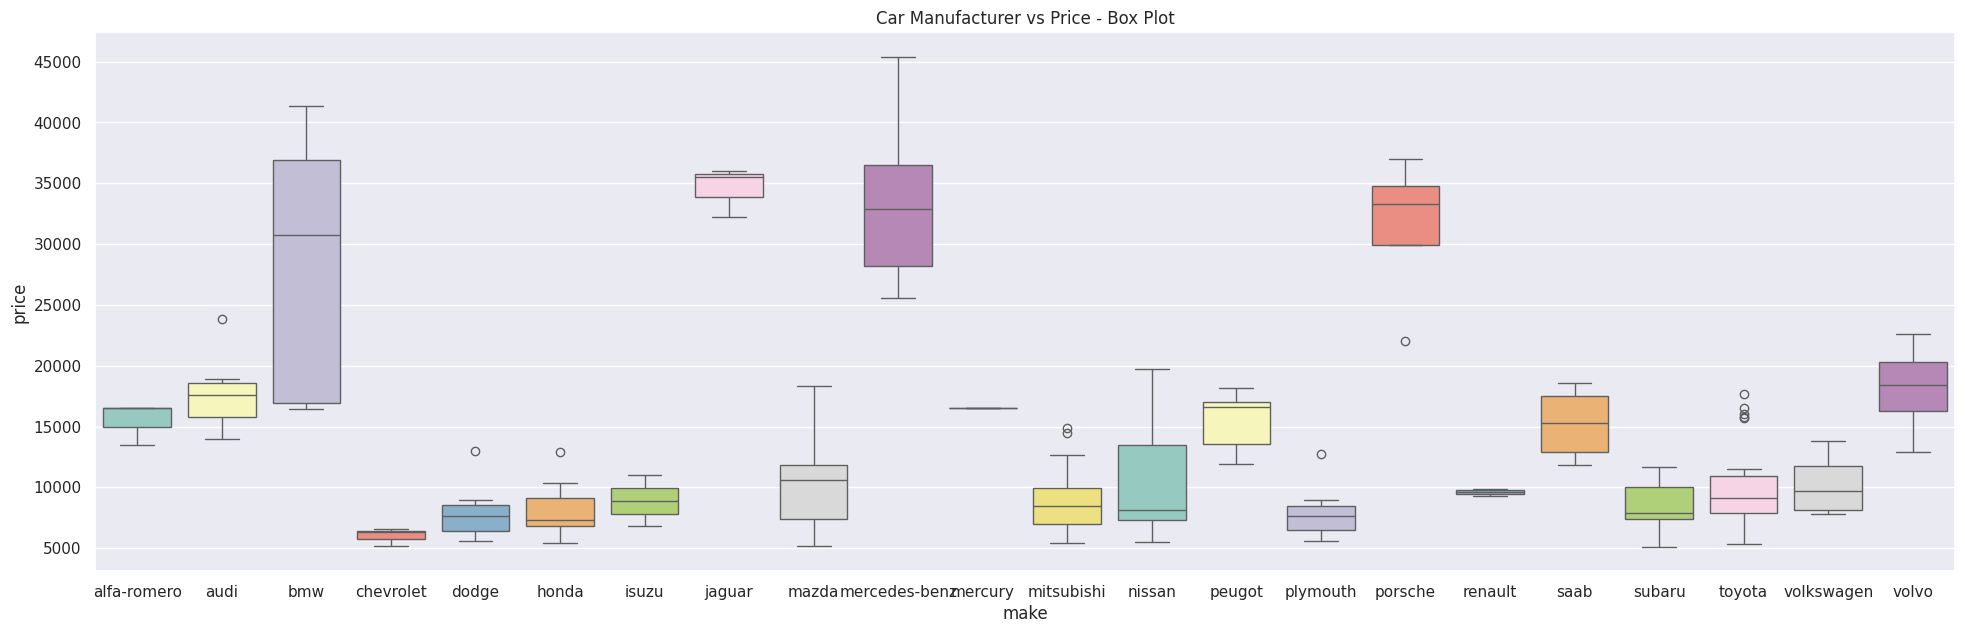

In [40]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')

<ipython-input-41-10344be32235>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')


Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

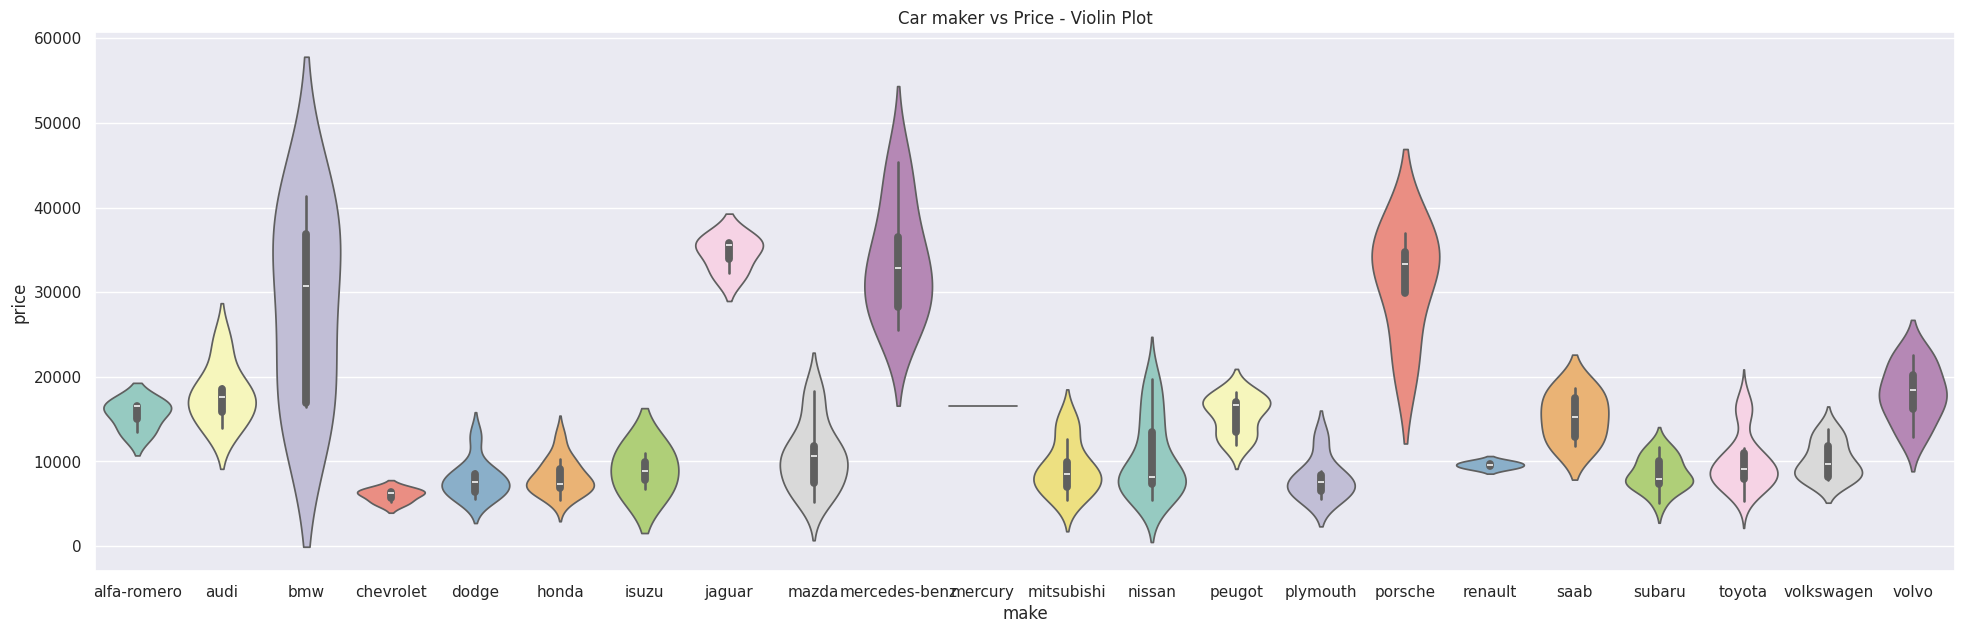

In [41]:
sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')

Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

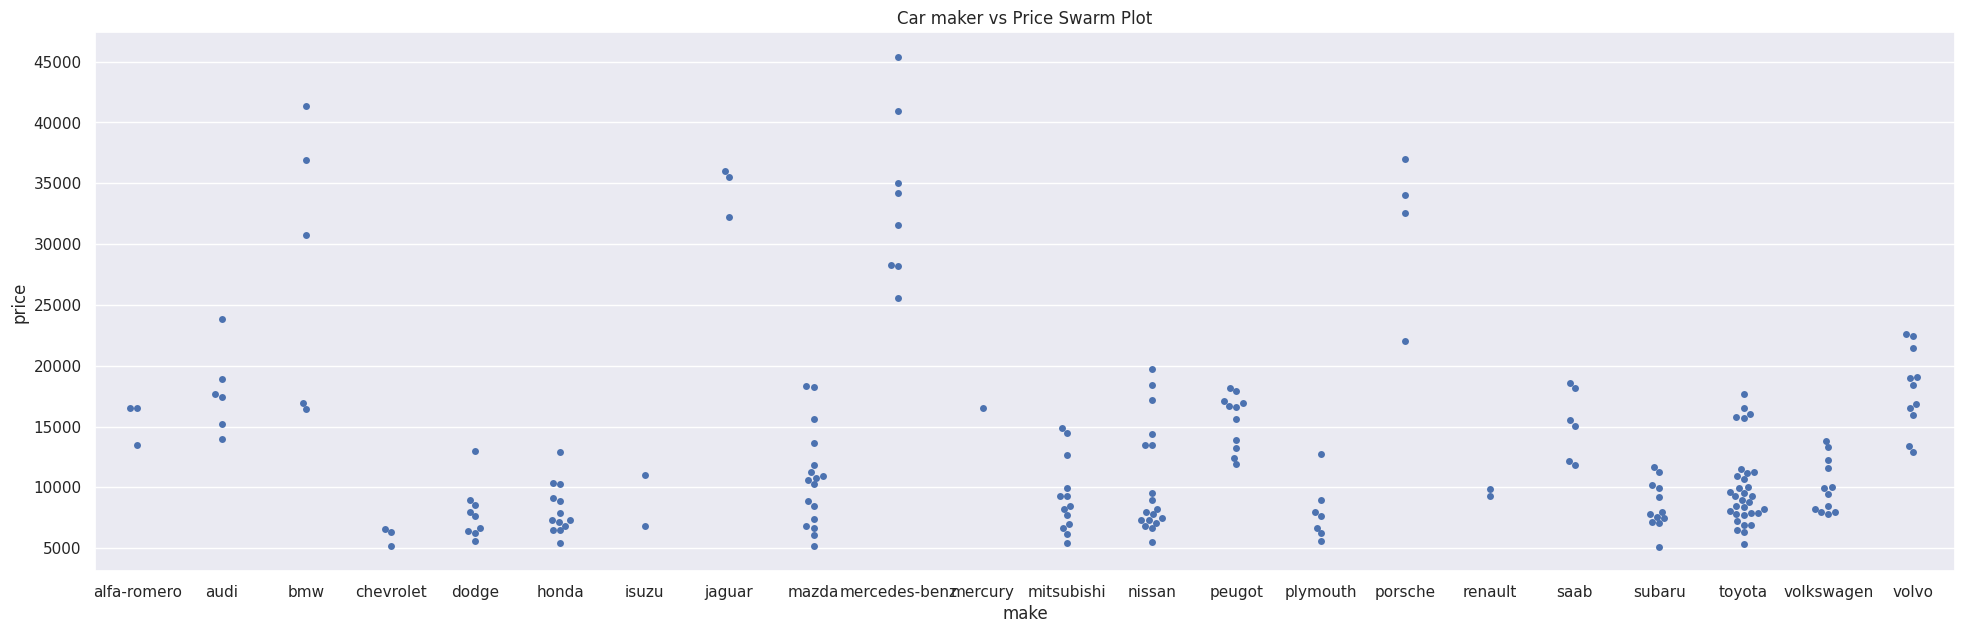

In [42]:
sns.swarmplot(x=X["make"],y=y).set_title('Car maker vs Price Swarm Plot')

<ipython-input-43-0bca5fd37bb7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"], y=X["horsepower"], palette="Set3").set_title('Car maker vs Horsepower Box Plot')


Text(0.5, 1.0, 'Car maker vs Horsepower Box Plot')

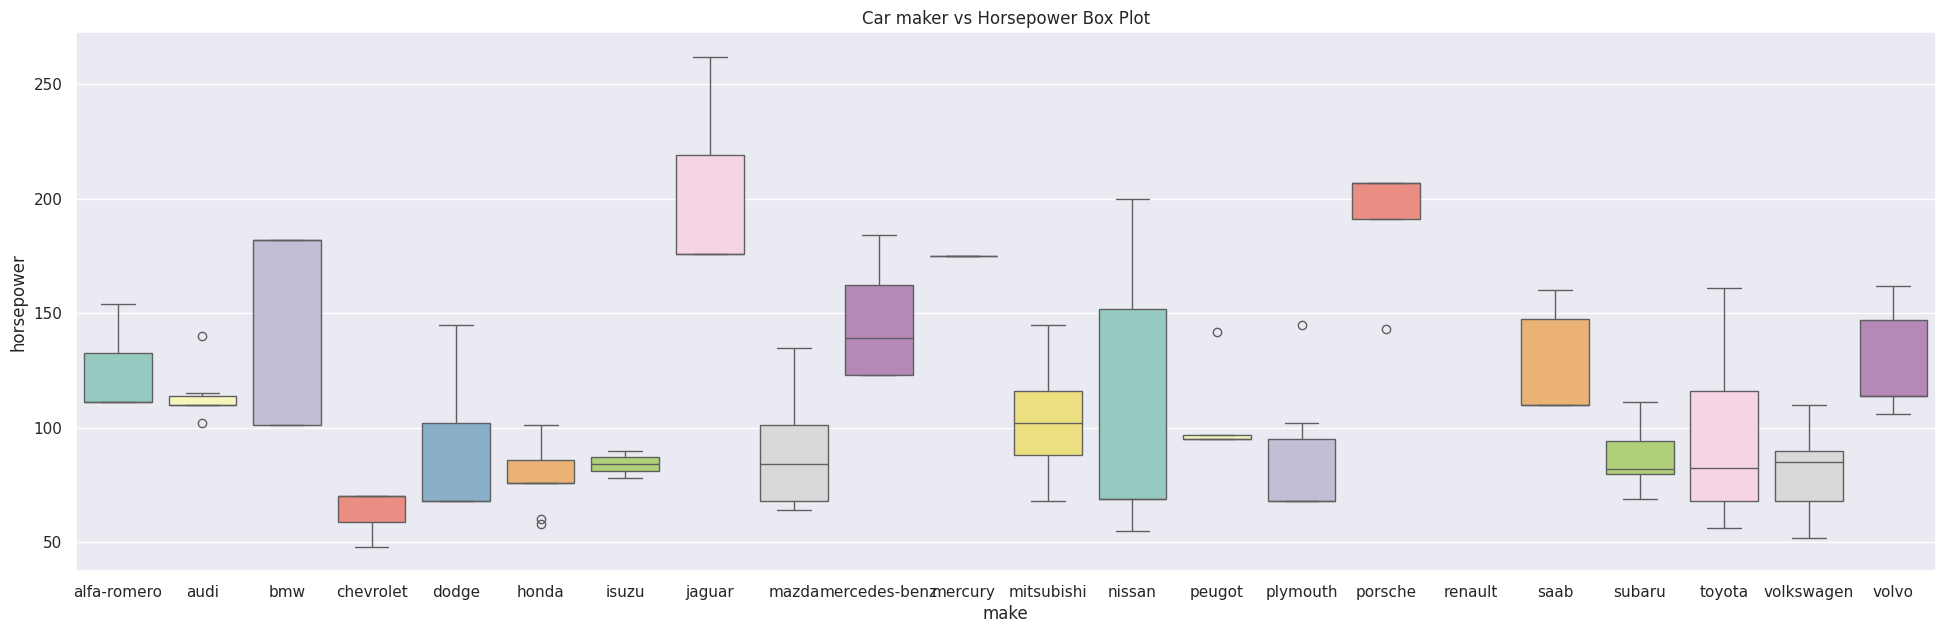

In [43]:
X["horsepower"] = pd.to_numeric(X["horsepower"], errors='coerce')
sns.boxplot(x=X["make"], y=X["horsepower"], palette="Set3").set_title('Car maker vs Horsepower Box Plot')


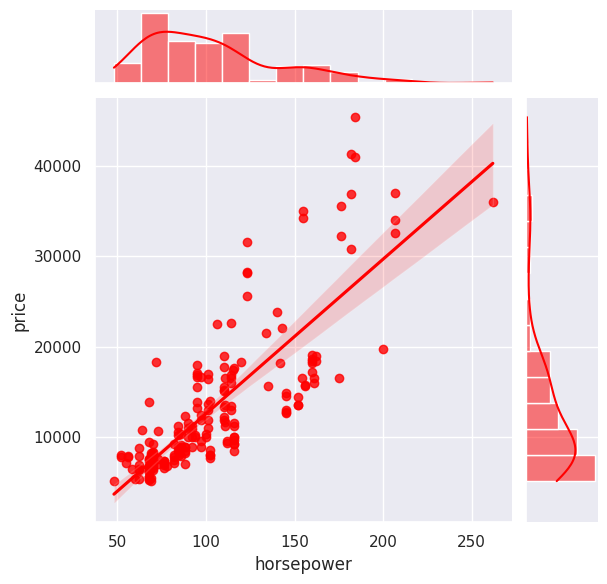

In [44]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'red')

# Exercise: Plot the jointplot for a feature which has negative correlation with the target variable "price".

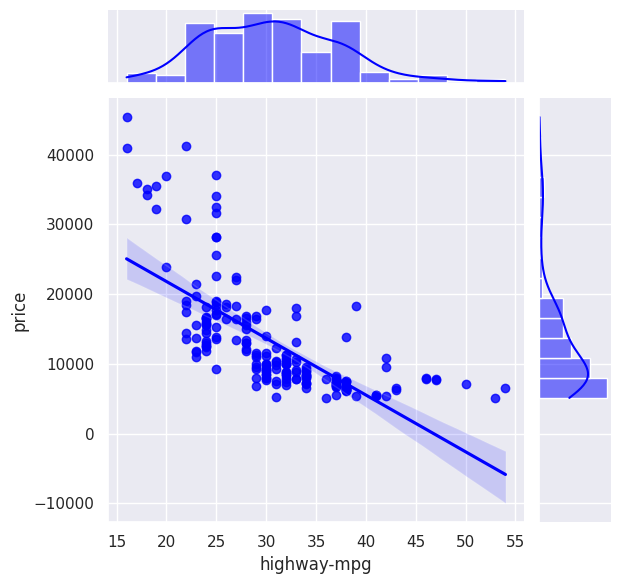

In [45]:
feature="highway-mpg"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'blue')

# Question

1. Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?

  The costliest body-type should be identified not just by max/min values but by looking at statistics like the median or mean price

2. Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

  Interpretation improves by considering the Interquartile range. It provides a clearer view of the typical price range and reduces the influence of outliers, making comparisons between body-types more accurate.

3. Do you think the body-style of a car can be a good predictor for its price?

  Body-style can be an indicator for price but may not be the strongest predictor on its own. Including additional variables like make, engine type, and horsepower would improve price prediction models significantly.

<ipython-input-46-5739ed01973b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')


Text(0.5, 1.0, 'Body style vs Price Box Plot')

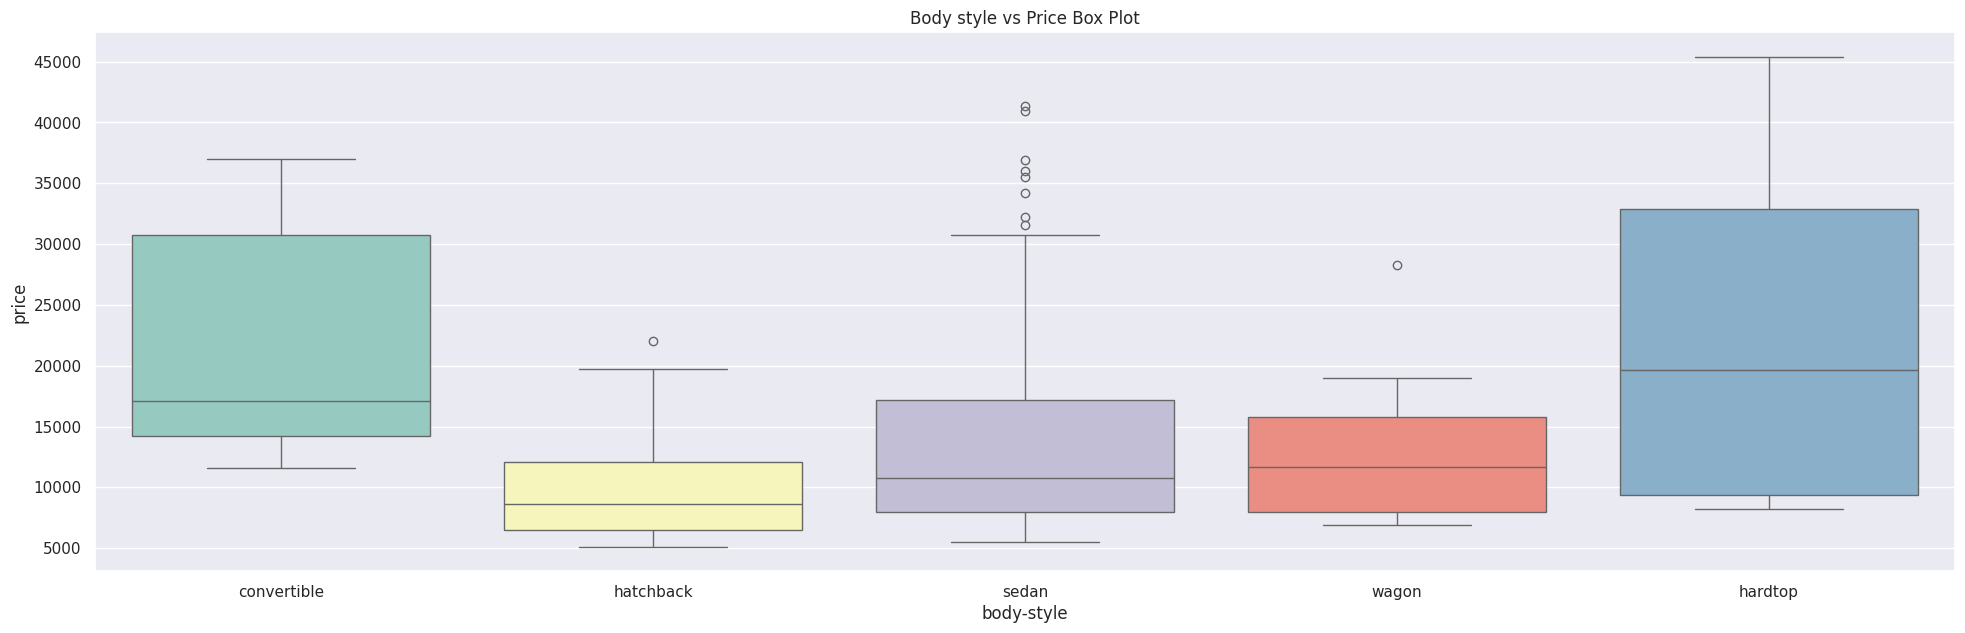

In [46]:
sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')

# Exercise

1.Plotting multiple plots together: Search for information about plt.subplots(). Choose any 2 plot types from the ones discussed above and plot them together in a single figure using subplots

<ipython-input-47-06f67f97bb00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"] = pd.to_numeric(data["price"])


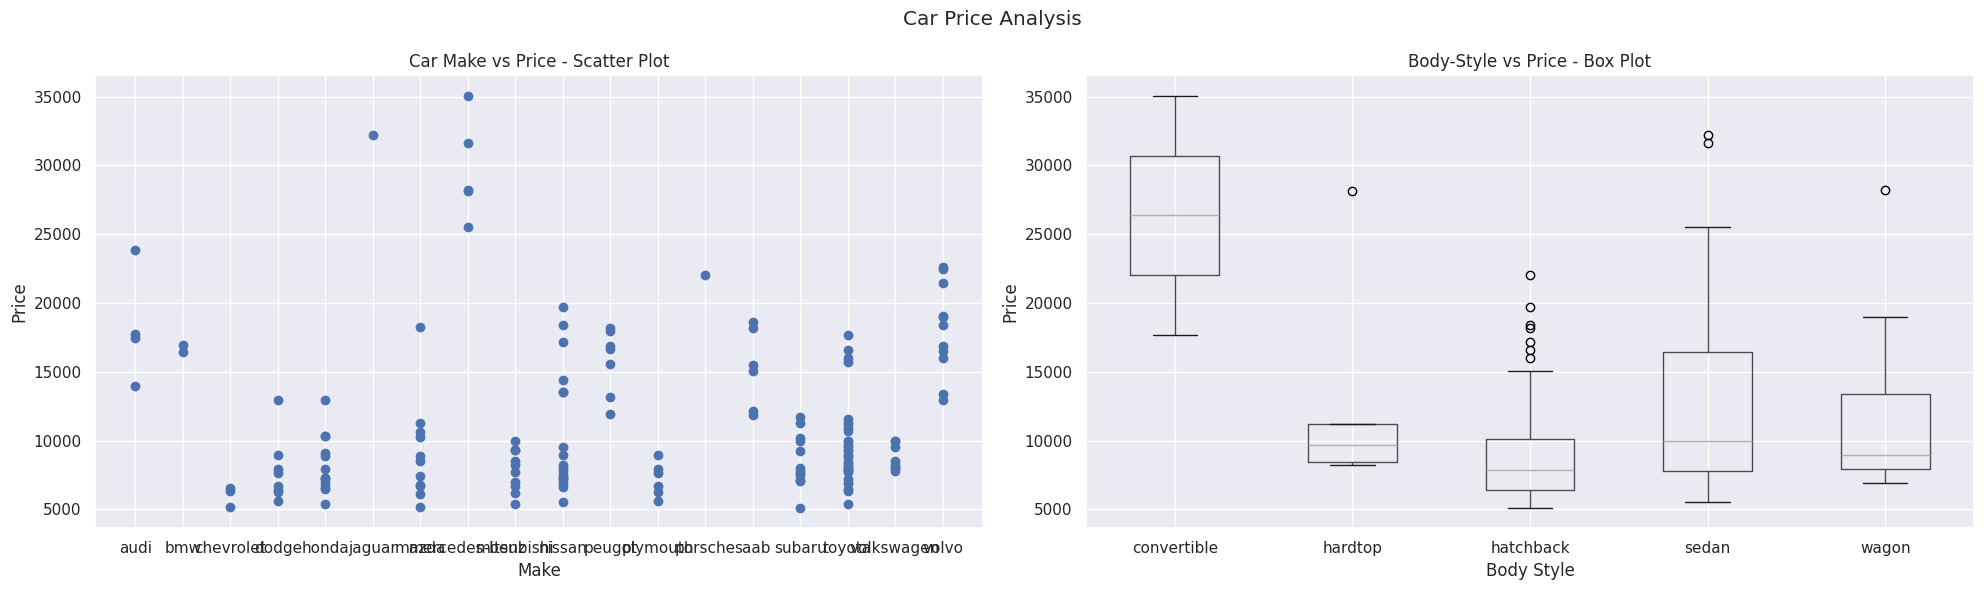

In [47]:
data.replace("?", np.nan, inplace=True)
data = data.dropna()
data["price"] = pd.to_numeric(data["price"])
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].scatter(data["make"], data["price"])
axes[0].set_title('Car Make vs Price - Scatter Plot')
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Price')


data.boxplot(column="price", by="body-style", ax=axes[1])
axes[1].set_title('Body-Style vs Price - Box Plot')
axes[1].set_xlabel('Body Style')
axes[1].set_ylabel('Price')


plt.suptitle('Car Price Analysis')
plt.tight_layout()
plt.show()


2. Go through the Seaborn documentation and find a plot type that has not been demonstrated in the examples above. Use this new plot type to represent the above data in a meaningful way.

<ipython-input-48-c01ff3237d7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="body-style", y="price", data=data, jitter=True, size=8, palette="viridis")


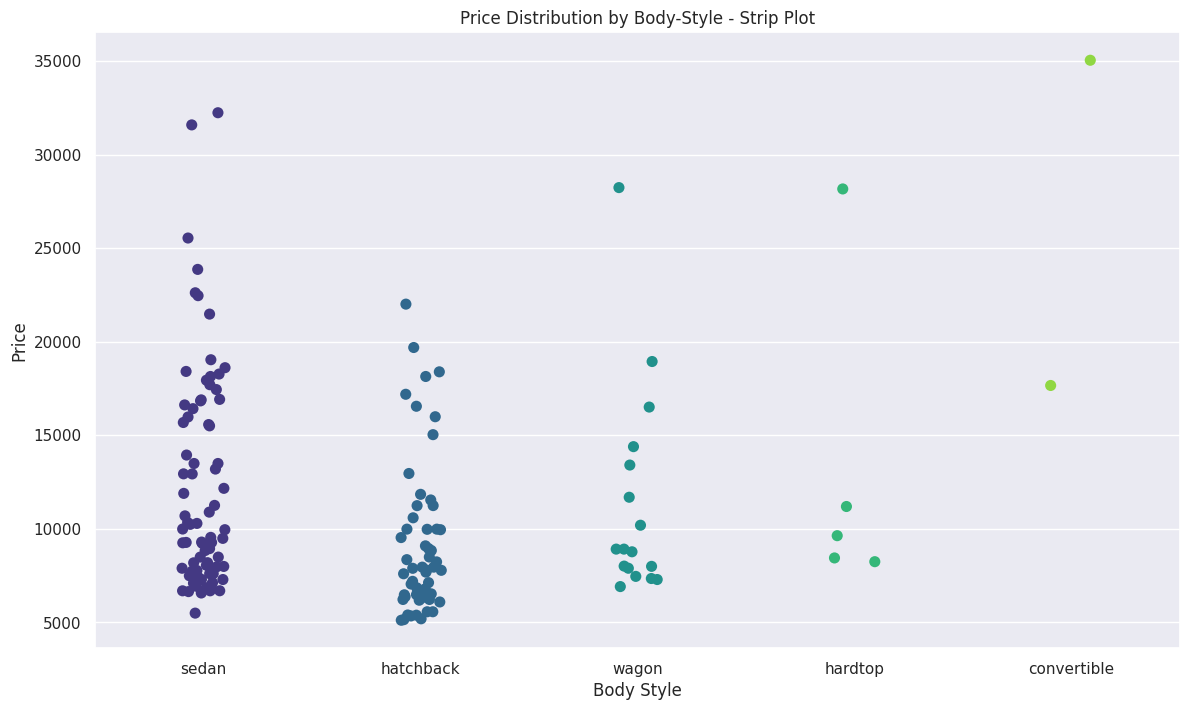

In [48]:
data.replace("?", np.nan, inplace=True)
data = data.dropna()
data["price"] = pd.to_numeric(data["price"])


plt.figure(figsize=(14, 8))
sns.stripplot(x="body-style", y="price", data=data, jitter=True, size=8, palette="viridis")


plt.title('Price Distribution by Body-Style - Strip Plot')
plt.xlabel('Body Style')
plt.ylabel('Price')


plt.show()
